In [ ]:
################################ NN with SMOTE-ENN resampling techniques ################################

In [1]:
#### Uploading the dataset and make some changes ####

In [2]:
# Start with importing the Taiwanese bank dataset.
import pandas as pd

df = pd.read_csv('C:/Users/basvd/OneDrive/Documenten/Tilburg University/Master Data Science & Society/Thesis/Data sets/Taiwan 2005 default credit card data set.csv')


In [3]:
# Show how to dataset looks like.
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [4]:
#Drop the ID column, since it has no value to the models that need to be made.
df = df.drop(df.columns[0], axis=1)
print(df.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0     

In [5]:
# See if there is any row with NA values in there.
## Below shows that there is no row with an NA value, meaning that we do not have to drop any row or fill it with, for example, the average.
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
# Normalize (just like in the last paper) the non-categorical independent variables.
from sklearn.preprocessing import MinMaxScaler

# Specify the columns you want to normalize
columns_to_normalize = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                        'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 
                        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AGE']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the specified columns and transform them
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the normalized DataFrame
print(df)


       LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  PAY_3  \
0       0.010101    2          2         1  0.051724      2      2     -1   
1       0.111111    2          2         2  0.086207     -1      2      0   
2       0.080808    2          2         2  0.224138      0      0      0   
3       0.040404    2          2         1  0.275862      0      0      0   
4       0.040404    1          2         1  0.620690     -1      0     -1   
...          ...  ...        ...       ...       ...    ...    ...    ...   
29995   0.212121    1          3         1  0.310345      0      0      0   
29996   0.141414    1          3         2  0.379310     -1     -1     -1   
29997   0.020202    1          2         2  0.275862      4      3      2   
29998   0.070707    1          3         1  0.344828      1     -1      0   
29999   0.040404    1          2         1  0.431034      0      0      0   

       PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AM

In [7]:
# Print the minimum and maximum values of the columns to check if they are indeed normalised.
print("Minimum values:")
print(df.min())

print("\nMaximum values:")
print(df.max())

Minimum values:
LIMIT_BAL                     0.0
SEX                           1.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                        -2.0
PAY_2                        -2.0
PAY_3                        -2.0
PAY_4                        -2.0
PAY_5                        -2.0
PAY_6                        -2.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default.payment.next.month    0.0
dtype: float64

Maximum values:
LIMIT_BAL                     1.0
SEX                           2.0
EDUCATION                     6.0
MARRIAGE                      3.0


In [8]:
from collections import Counter

# First we will see how the classes are divided.
input_cols = df.drop(columns='default.payment.next.month')
target_col = df['default.payment.next.month']
print('Original dataset shape %s' % Counter(target_col))

Original dataset shape Counter({0: 23364, 1: 6636})


In [9]:
# Now we will implement SMOTE-ENN to get the classes balanced again.
from imblearn.combine import SMOTEENN
from collections import Counter

# Apply SMOTE-ENN
smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
input_cols_res_ENN, target_col_res_ENN = smote_enn.fit_resample(input_cols, target_col)
print('Resampled dataset shape %s' % Counter(target_col_res_ENN))

c:\Users\basvd\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\basvd\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Resampled dataset shape Counter({1: 15422, 0: 12129})


In [10]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score


# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)

# define the model
model = MLPClassifier(random_state=42, max_iter=1000)  # Example: Increase max_iter to 1000

# define search space
space = dict()
#space['hidden_layer_sizes'] = [(100,), (50, 50), (30, 30, 30)]
space['activation'] = ['relu']
space['solver'] = ['sgd', 'adam', 'adamax']
space['batch_size'] = [16, 32, 64]  # Options for batch size
space['learning_rate'] = ['constant', 'adaptive', 'invscaling']  # Options for learning rate
space['momentum'] = [0.0, 0.5, 0.9]  # Options for momentum

# define search
search = GridSearchCV(model, space, scoring='f1', n_jobs=1, cv=cv_inner, refit=True)

# fit the grid search to the data
search.fit(input_cols_res_ENN, target_col_res_ENN)

# Access the best hyperparameters
best_params = search.best_params_
print("Best hyperparameters:", best_params)

# Use the best model found by the grid search
best_model = search.best_estimator_

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# Execute the nested cross-validation
predicted_labels = cross_val_predict(best_model, input_cols_res_ENN, target_col_res_ENN, cv=cv_outer, n_jobs=-1)

# Generate the classification report
report = classification_report(target_col_res_ENN, predicted_labels, digits=4)
print(report)

# Store f1 scores of outer CV
import numpy as np

# Execute the outer cross-validation loop to get f1 scores
f1_scores_outer_cv = []
for train_index, test_index in cv_outer.split(input_cols_res_ENN):
    X_train, X_test = input_cols_res_ENN.values[train_index], input_cols_res_ENN.values[test_index]
    y_train, y_test = target_col_res_ENN.values[train_index], target_col_res_ENN.values[test_index]
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    f1_score_outer_cv = f1_score(y_test, y_pred)
    f1_scores_outer_cv.append(f1_score_outer_cv)

# Now f1_scores_outer_cv contains the f1 scores of the outer cross-validation loop
print("F1 scores of outer CV:", f1_scores_outer_cv)

Best hyperparameters: {'activation': 'relu', 'batch_size': 16, 'learning_rate': 'adaptive', 'momentum': 0.5, 'solver': 'sgd'}
              precision    recall  f1-score   support

           0     0.7617    0.8914    0.8215     12129
           1     0.9014    0.7807    0.8367     15422

    accuracy                         0.8294     27551
   macro avg     0.8316    0.8361    0.8291     27551
weighted avg     0.8399    0.8294    0.8300     27551

F1 scores of outer CV: [0.8289106145251397, 0.8475415634948709, 0.8313167259786477, 0.8268428372739917, 0.8415602347255782, 0.8255199154035954, 0.8497304582210242, 0.8395904436860068, 0.8399592252803262, 0.8355146798726565]


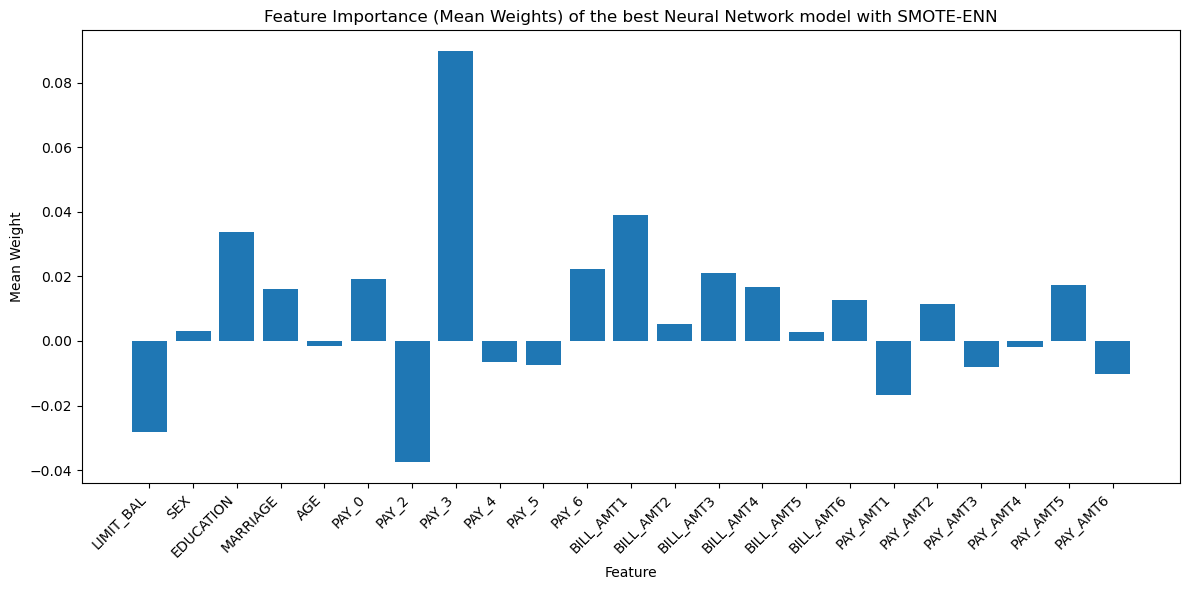

In [13]:
import matplotlib.pyplot as plt

feature_importance = best_model.coefs_[0]
# Get the mean weights across neurons for each feature
mean_feature_importance = feature_importance.mean(axis=1)

# Get the column names of the input data (assuming input_cols is a DataFrame)
feature_names = input_cols_res_ENN.columns

# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_names, mean_feature_importance)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Feature')
plt.ylabel('Mean Weight') ## MEAN WEIGTHS --> OMDAT JE HET GEMIDDELDE PAKT OVER DE 100 NEURONS IN DE EERSTE LAAG!
plt.title('Feature Importance (Mean Weights) of the best Neural Network model with SMOTE-ENN')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

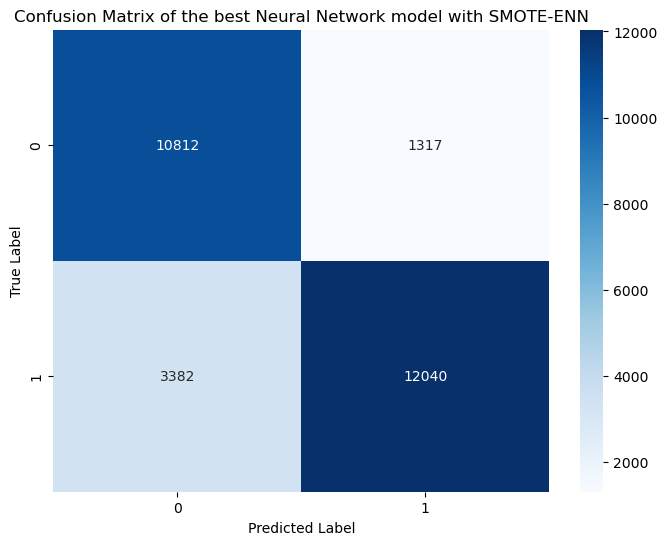

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define plot_confusion_matrix function
def plot_confusion_matrix(cm, set_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix of the best Neural Network model with SMOTE-ENN")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(target_col_res_ENN, predicted_labels)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, "Test")